In [45]:
source('./data_processing.R')

In [33]:
my_colors <- c("D" = 'black', 'I' = 'grey60', 
               'A' = 'darkgreen', 'T' = 'brown1', 
               'G' = 'orange', 'C'= 'royalblue')

# iPSC_lane1

In [46]:
input_dir = './GiRAFR_outputs/Tian_Neuron/sample1/'
output_dir = './figures_results/Tian_Neuron/sample1'

### UMI mutation

[1] "Number of mutant UMI"
[1] "Processed cell number: 12623"
[1] "Wildtype UMI: 216577"
[1] "Mutant UMI: 24546"


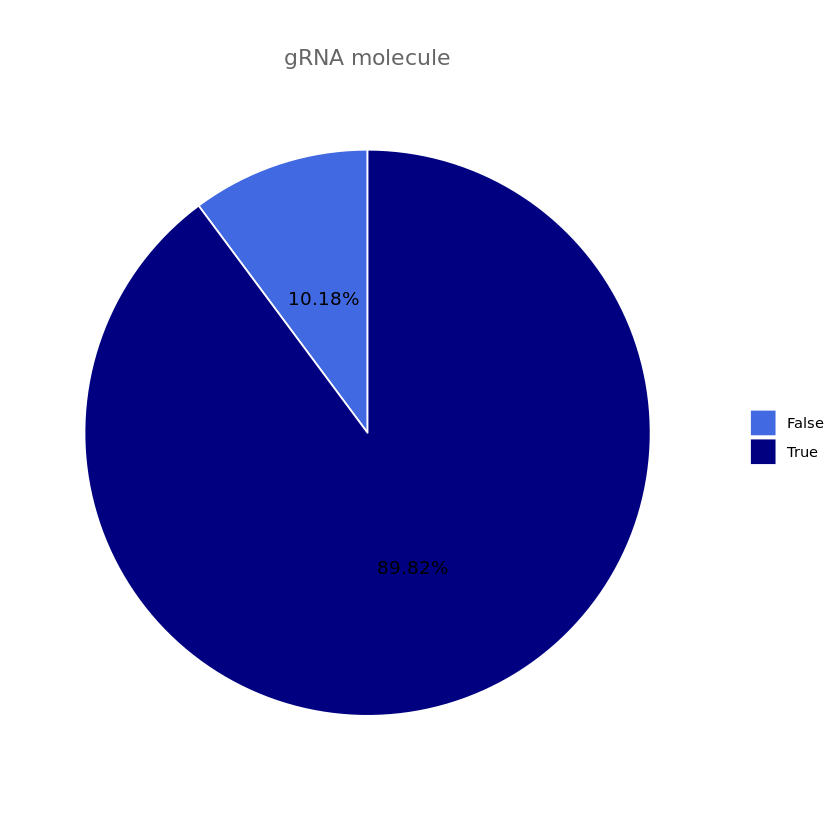

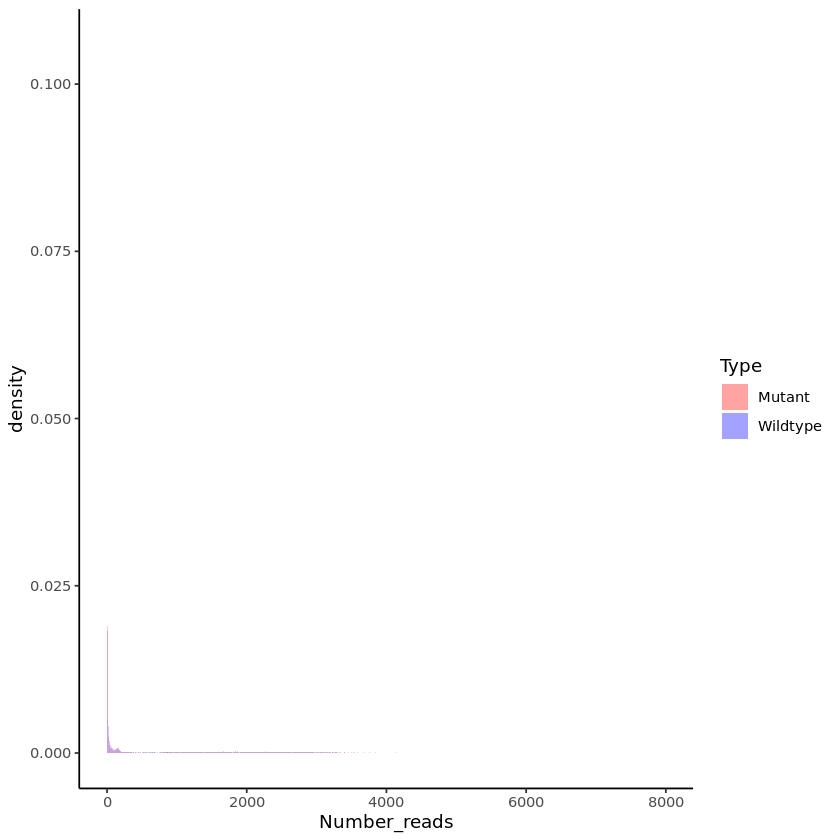

In [4]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)


### source of mutation

In [5]:
#consensus.count.matrix <- source_mutation(input_dir)

`summarise()` has grouped output by 'Cell', 'gRNA_target'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Cell', 'gRNA_target'. You can override using the `.groups` argument.


[1] "MT_lib_prep: 3028"
[1] "MT_virus: 21134"


### MT.txt

[1] "MT mutation table"

   A    C D(1) D(2) D(4)    G I(1) I(2) I(4) I(8)    T 
 262  171   51    3    1  138   26    1    2    1  221 
[1] "MT mutation type"

  D   I   S 
 55  30 792 
[1] "MT mutation structure"

gRNA Rest   U6 
 589  207   81 


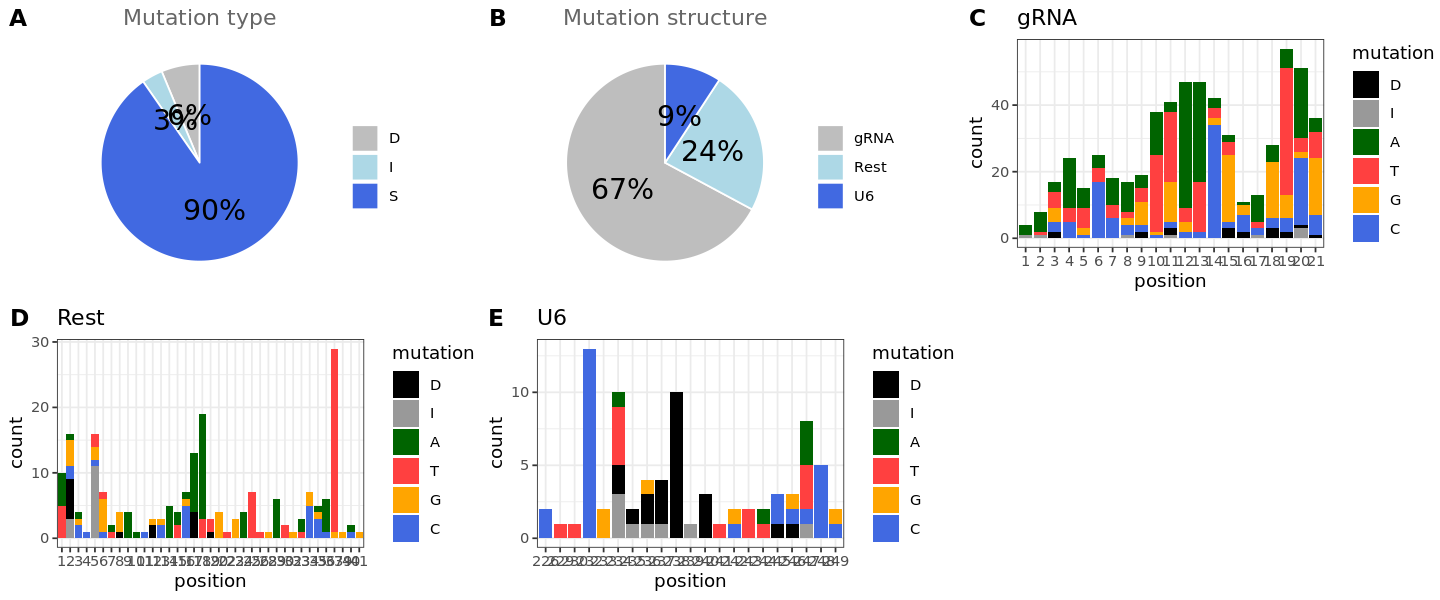

In [35]:
options(repr.plot.width = 12, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)


* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [36]:

Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.886   1.000  11.000 

In [38]:
save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'U6'), 'position'] <- MT2[which(MT2$structure == 'U6'), 'position']-250
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'CCTTGGAGAACCACCTTGTTGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')
dev.off()

Warning message:
“Removed 42 rows containing non-finite values (stat_count).”


png 
  2

### Cell assignment

Rows: 13970 Columns: 1
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'cb'. You can override using the `.groups` argument.


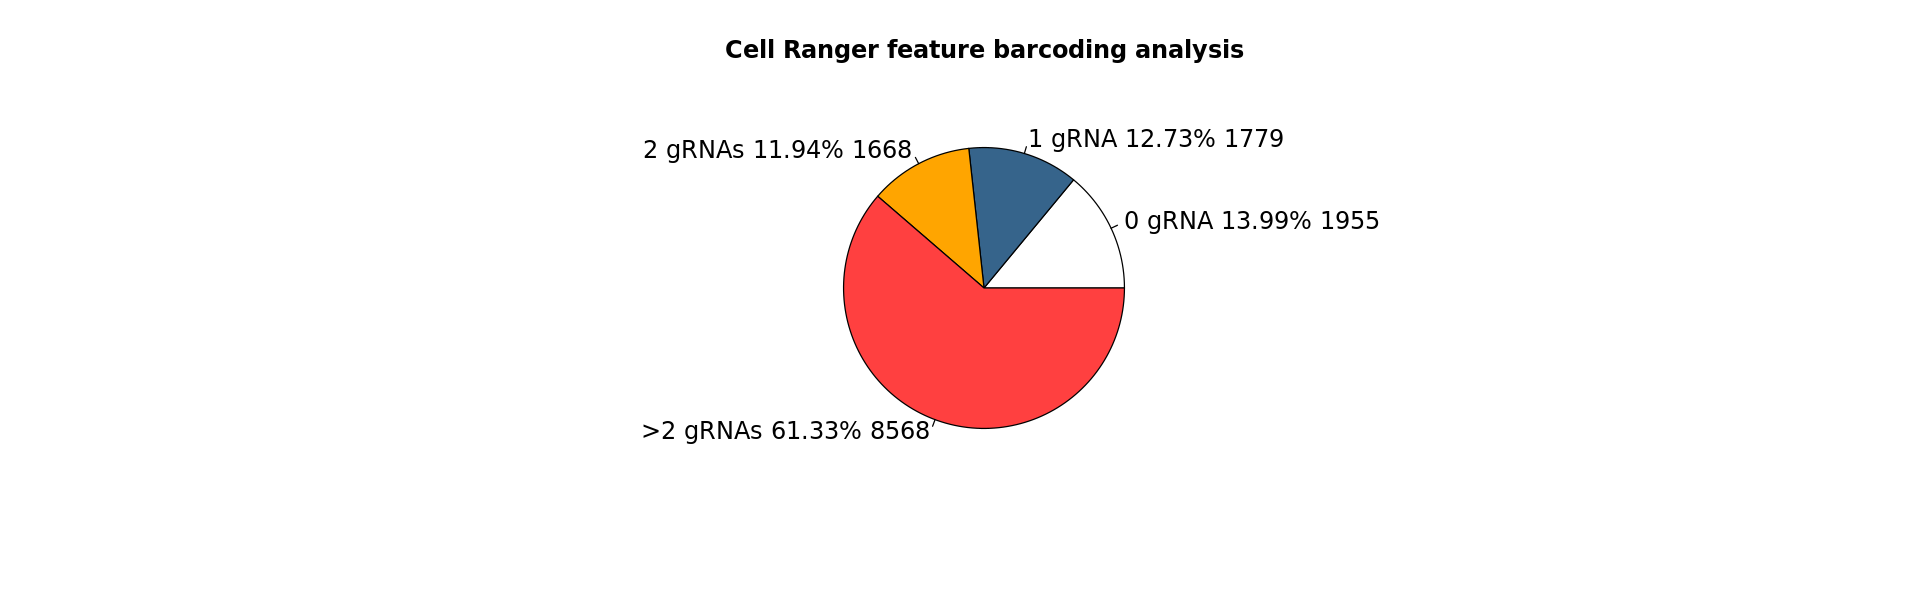

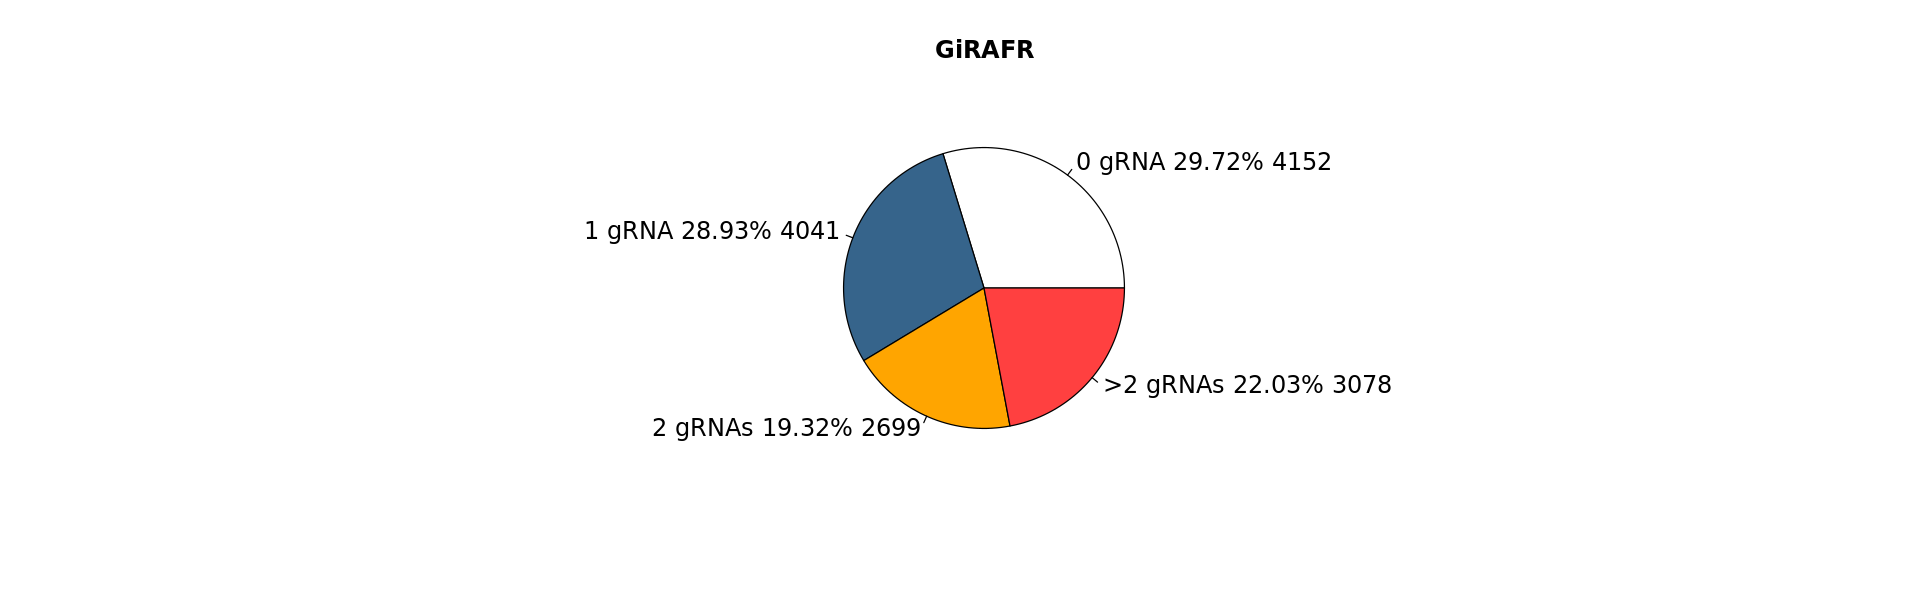

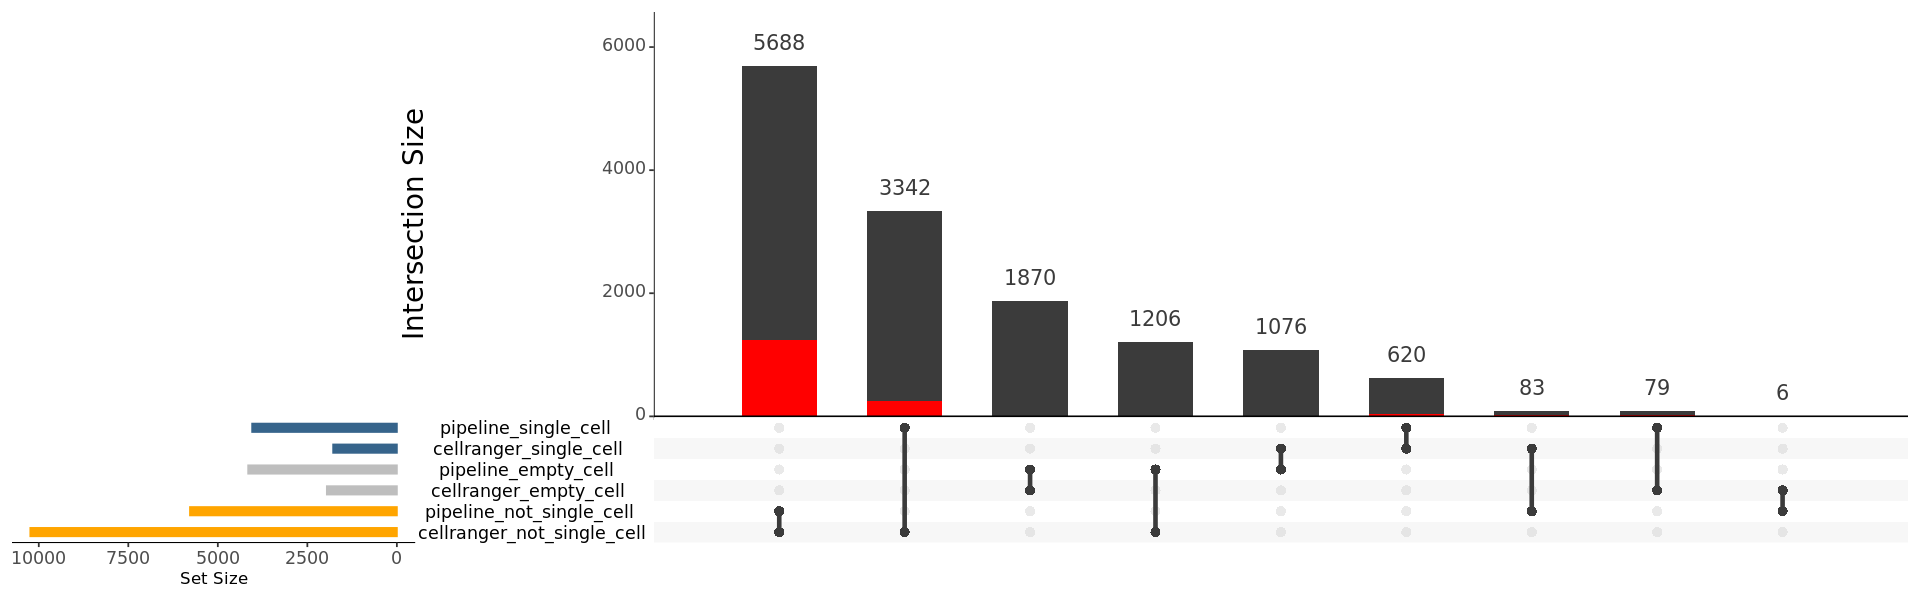

In [47]:
protospacer_calls_per_cell <- '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_Neuron/feature_barcoding_analysis/iPSC_lane1//outs/crispr_analysis/protospacer_calls_per_cell.csv'
cellranger_barcode <- "/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_Neuron/feature_barcoding_analysis/iPSC_lane1/outs/filtered_feature_bc_matrix/barcodes.tsv.gz"

compare_cell_numer(protospacer_calls_per_cell, cellranger_barcode, input_dir, output_dir)


In [77]:
girafr.umi.threshold <- read.table('./GiRAFR_outputs/Tian_Neuron/sample1/gRNA.umi.threshold.txt')
girafr.umi.threshold$V1 <- sub('_gene','',girafr.umi.threshold$V1)
cellranger.umi.threshold <- read.table('/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_Neuron/feature_barcoding_analysis/iPSC_lane1/outs/crispr_analysis/protospacer_umi_thresholds.csv', sep = ',', header = T)


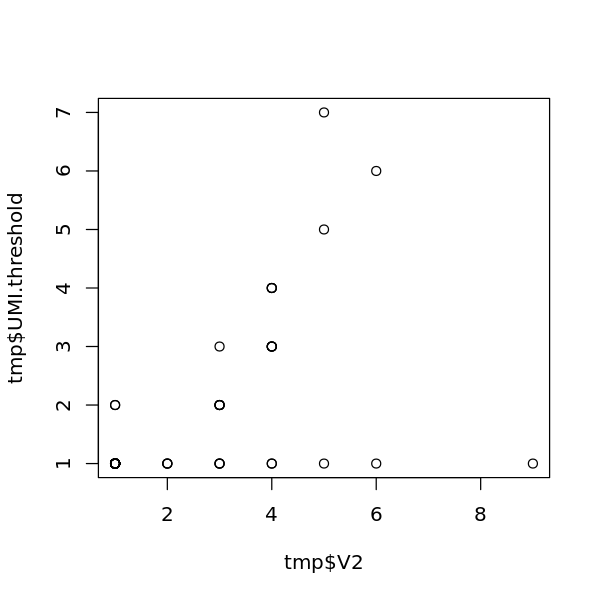

In [80]:
options(repr.plot.width = 5, repr.plot.height = 5)
tmp <- merge(girafr.umi.threshold, cellranger.umi.threshold, by.x = 'V1', by.y = 'Protospacer')
plot(tmp$V2, tmp$UMI.threshold)

# iPSC_lane2

In [39]:
input_dir = './GiRAFR_outputs/Tian_Neuron/sample2/'
output_dir = './figures_results/Tian_Neuron/sample2'

### UMI mutation

[1] "Number of mutant UMI"
[1] "Processed cell number: 11359"
[1] "Wildtype UMI: 214267"
[1] "Mutant UMI: 23468"


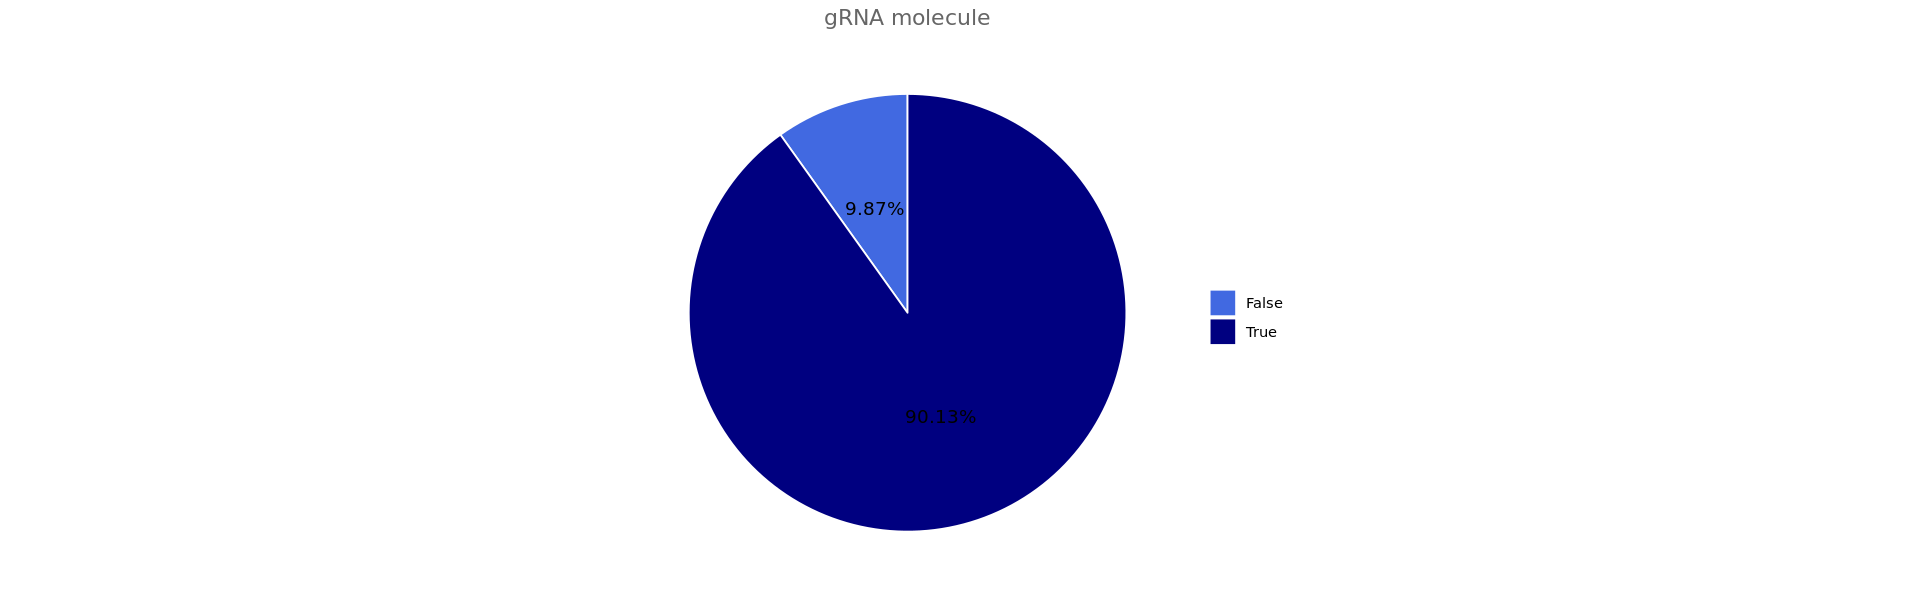

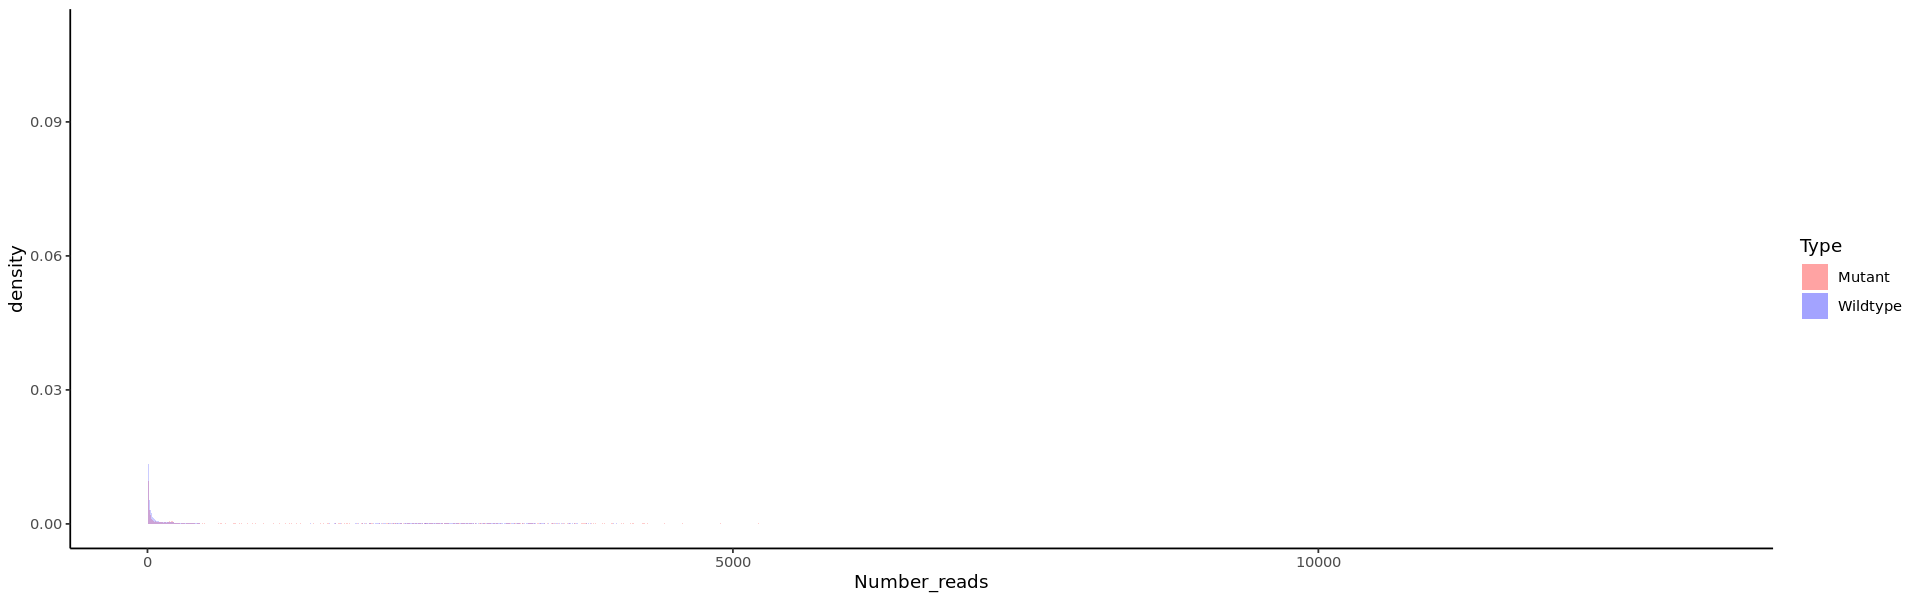

In [16]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)

### source of mutation

In [18]:
#consensus.count.matrix <- source_mutation(input_dir)

`summarise()` has grouped output by 'Cell', 'gRNA_target'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Cell', 'gRNA_target'. You can override using the `.groups` argument.


[1] "MT_lib_prep: 3085"
[1] "MT_virus: 19917"


### MT.txt

[1] "MT mutation table"

   A    C D(1) D(2) D(3)    G I(1) I(3) I(5)    T 
 288  182   45    6    4  136   27    2    1  246 
[1] "MT mutation type"

  D   I   S 
 55  30 852 
[1] "MT mutation structure"

gRNA Rest   U6 
 672  173   92 


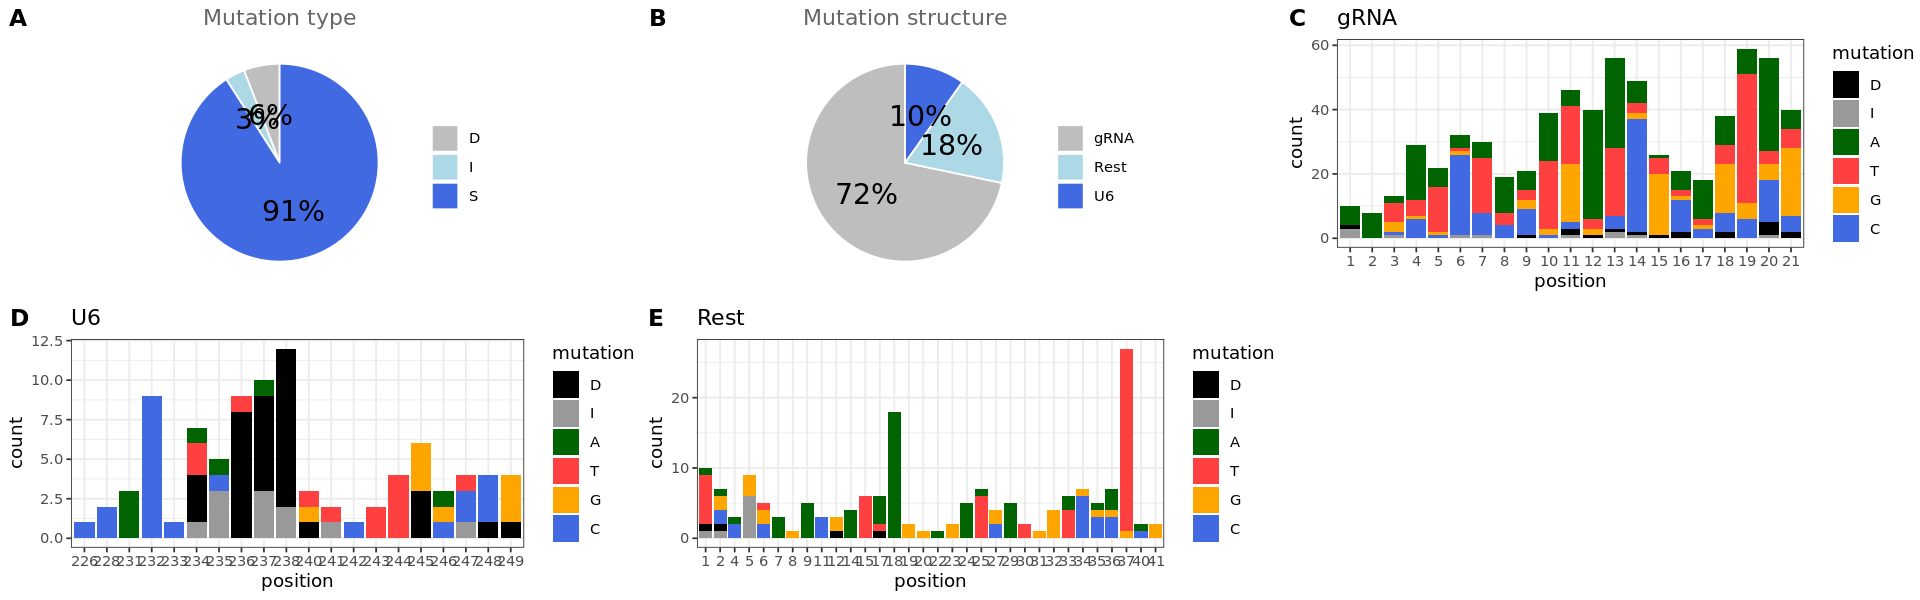

In [40]:
MT <- plot_MT_pattern(input_dir, output_dir)


* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [41]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.985   1.000  11.000 

In [43]:
save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'U6'), 'position'] <- MT2[which(MT2$structure == 'U6'), 'position']-250
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'CCTTGGAGAACCACCTTGTTGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')
dev.off()

Warning message:
“Removed 41 rows containing non-finite values (stat_count).”


png 
  2

### Cell assignment

Rows: 12331 Columns: 1
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'cb'. You can override using the `.groups` argument.


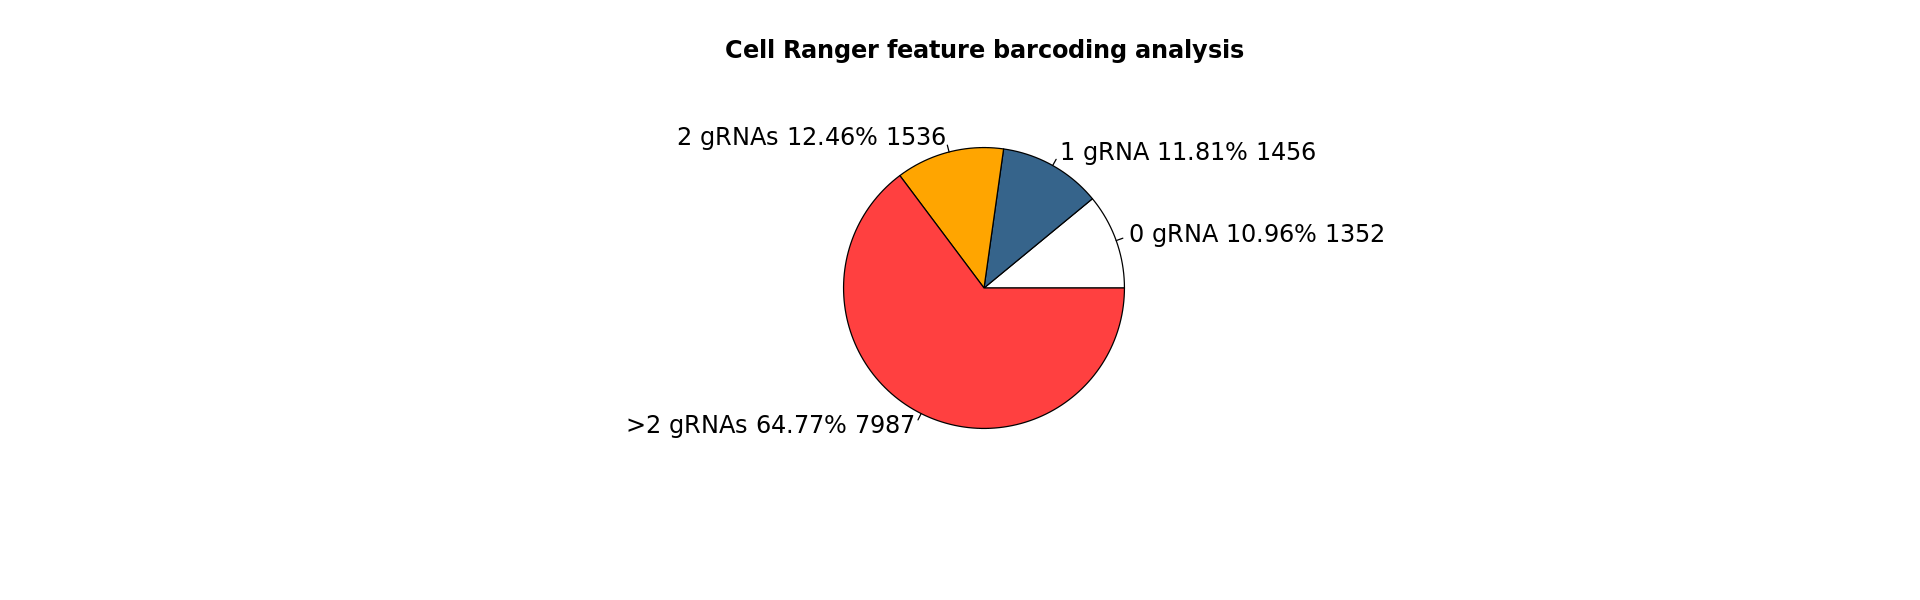

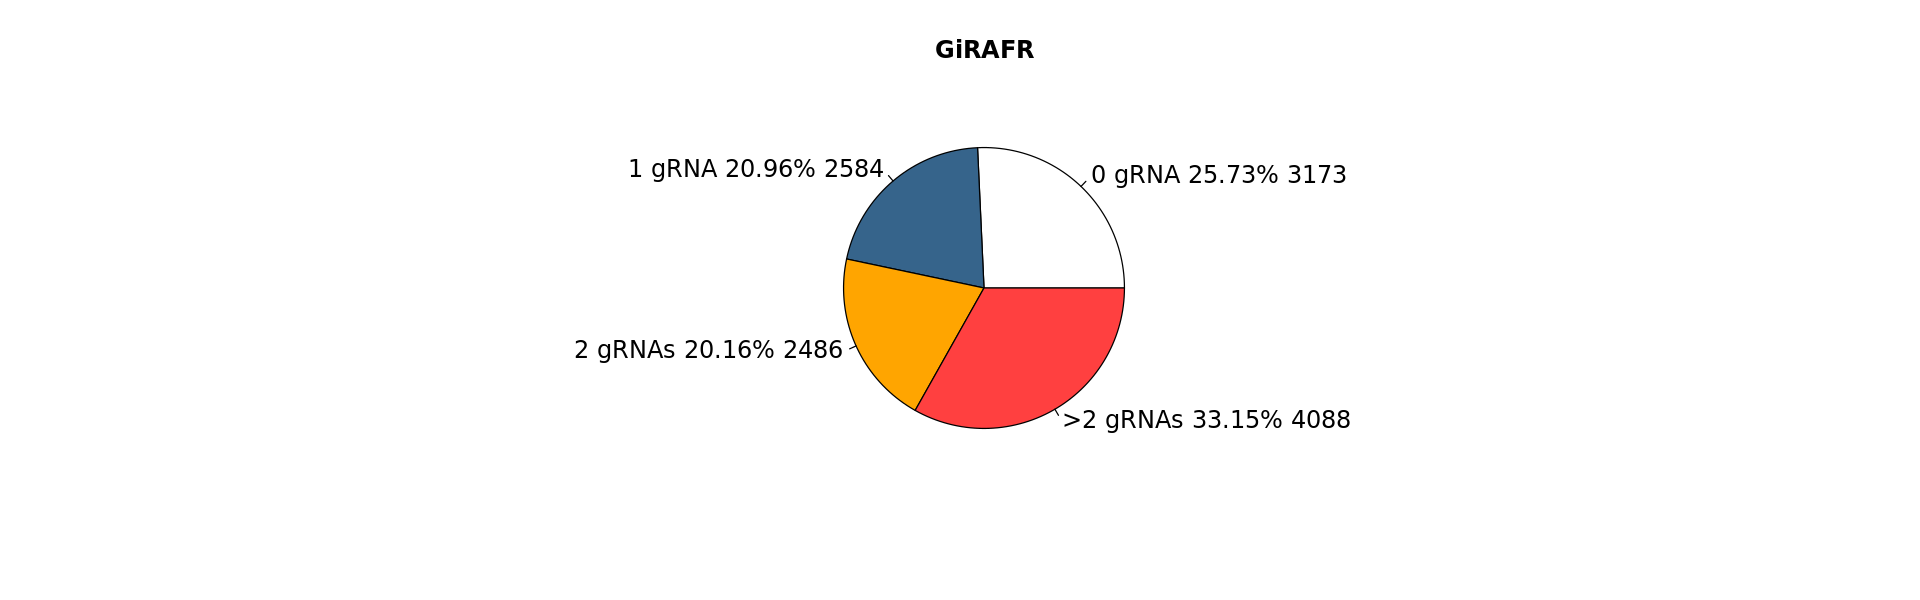

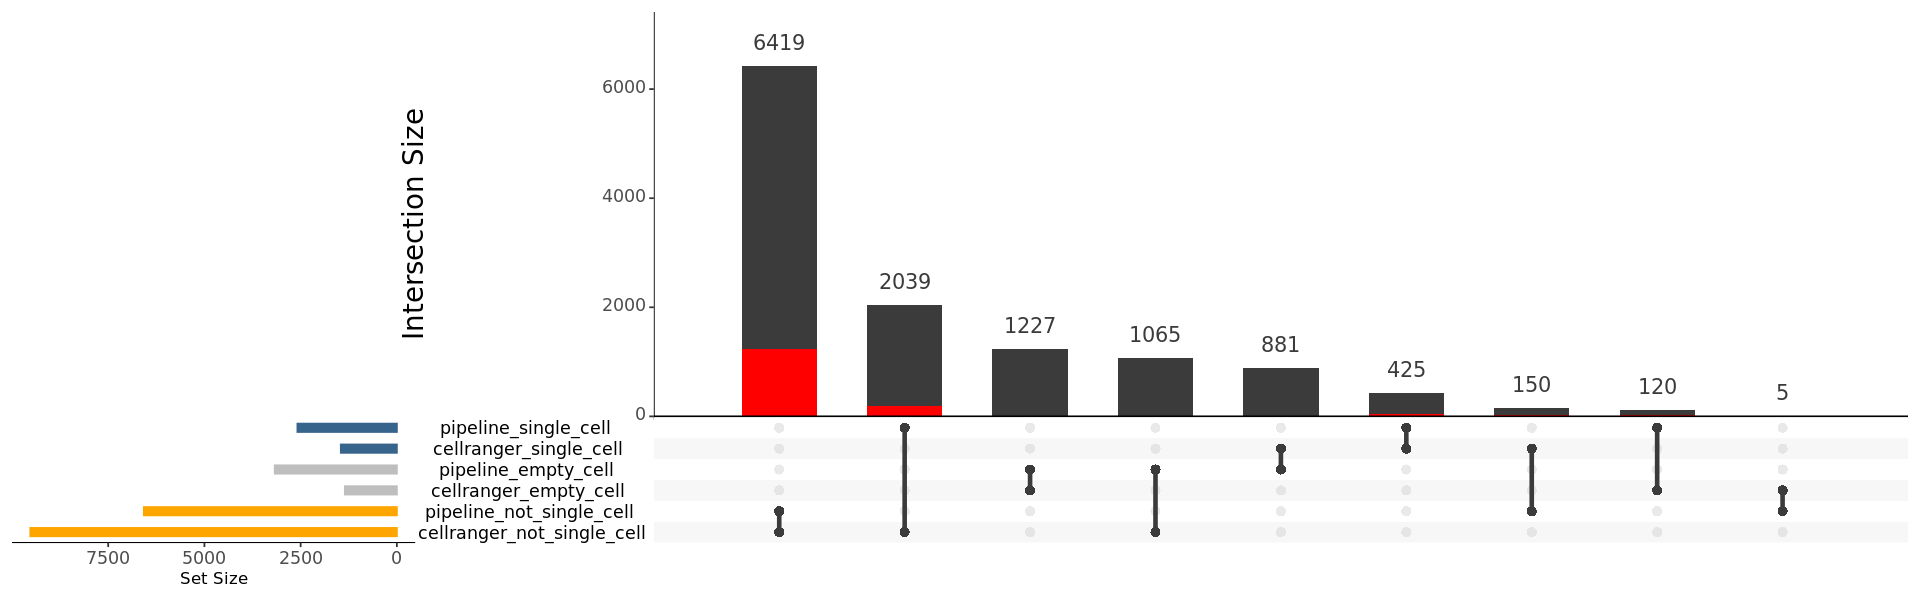

In [21]:
protospacer_calls_per_cell <- '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_Neuron/feature_barcoding_analysis/iPSC_lane2//outs/crispr_analysis/protospacer_calls_per_cell.csv'
cellranger_barcode <- "/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_Neuron/feature_barcoding_analysis/iPSC_lane2/outs/filtered_feature_bc_matrix/barcodes.tsv.gz"
compare_cell_numer(protospacer_calls_per_cell, cellranger_barcode, input_dir, output_dir)


# combine samples MT position

In [44]:
rm(list = ls())
my_colors <- c("D" = 'black', 'I' = 'grey60', 
               'A' = 'darkgreen', 'T' = 'brown1', 
               'G' = 'orange', 'C'= 'royalblue')

input_dir = './GiRAFR_outputs/Tian_Neuron/sample1/'
MT_file <- paste0(input_dir, '/all.MT.txt')
MT_sample1 <- read.table(MT_file, header = FALSE)
colnames(MT_sample1) <- c('gene name','structure','structure length', 'position','mutation','variant number')

input_dir = './GiRAFR_outputs/Tian_Neuron/sample2/'
MT_file <- paste0(input_dir, '/all.MT.txt')
MT_sample2 <- read.table(MT_file, header = FALSE)
colnames(MT_sample2) <- c('gene name','structure','structure length', 'position','mutation','variant number')

save_pdf <- paste0('./figures_results/Tian_Neuron/', 'Combined.all.MT_position_adjusted.pdf')
pdf(save_pdf, width = 16, height = 5)

MT2 <- rbind(MT_sample1, MT_sample2)
MT2[which(MT2$structure == 'U6'), 'position'] <- MT2[which(MT2$structure == 'U6'), 'position']-250
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20, 55, by =1))
MT2$mutation2 <- MT2$mutation
MT2$mutation2[grepl('D', MT2$mutation2)] <- 'D' 
MT2$mutation2[grepl('I', MT2$mutation2)] <- 'I'
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))


ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(aes(y = (..count..)/2))+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'CCTTGGAGAACCACCTTGTTGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')


ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(aes(y = (..count..)/2))+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme(panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      axis.title.x=element_blank(),
      axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.ticks.x=element_blank(),
      plot.title = element_text(size = 18))+
scale_x_discrete(limits = levels(MT2$position))+scale_y_continuous(breaks = c(0,60))

dev.off()

Warning message:
“Removed 83 rows containing non-finite values (stat_count).”
Warning message:
“Removed 83 rows containing non-finite values (stat_count).”


png 
  2

# Cell number comparison

In [1]:
filtered_barcodes <- read.table('/staging/leuven/stg_00064/projects/cropseq/267genes/develop/paper/Tian_Neuron/barcodes.tsv', header = FALSE)
#filtered_barcodes$V1 <- sub('-1','',filtered_barcodes$V1)
nrow(filtered_barcodes)
paper <- read.csv('../../public_data/Tian_Neuron/GSM3543620_iPSC_1_sgRNA_mapping.txt',sep = '\t')
dim(paper)
sum(paper$cell %in% filtered_barcodes$V1)


[1] 13970

[1] 2588078       4

[1] 1165822

In [2]:
head(paper)


,cell,barcode,read_count,umi_count
,<chr>,<chr>,<int>,<int>
1,ACCGTAAGTCAAGCGA-1,GGCTCCAGTTAACGCAGTCG,1,1
2,TCTCTAAAGACAGACC-1,GAGTTACAGACAGCTGACCA,0,0
3,TCTCTAAAGACAGACC-1,GGCGCTGGCCGCAGTCTGAC,0,0
4,TCTCTAAAGACAGACC-1,GTCCCTTTCCTGTCAGACTG,0,0
5,TCTCTAAAGACAGACC-1,GCACCTCCAGATCTCACTAG,6,1
6,TCTCTAAAGACAGACC-1,GCTCTCGCGGTTCATGACAG,0,0


From paper: UMI counts > 4 standard deviations of the mean UMI counts of all sgRNAs assign to that cell

In [ ]:
n_col = max(count.fields('../shifrut_Cell/D1S/lower_threshold/cells.gRNA.txt', sep = "\t"))
cells.gRNA <- read.table('../shifrut_Cell/D1S/lower_threshold/cells.gRNA.txt', 
                         header = FALSE, fill = TRUE, stringsAsFactors = FALSE,col.names =1:n_col)
                                     
colnames(cells.gRNA)[1:7]= c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))
nrow(cells.num_features)
table(cells.num_features$num_features)

protospacer_calls_per_cell <-read.csv('/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/shifrut_Cell//feature_barcoding_analysis/D1S/outs/crispr_analysis/protospacer_calls_per_cell.csv', stringsAsFactors = FALSE)
protospacer_calls_per_cell$cell_barcode <- sub('-1','',protospacer_calls_per_cell$cell_barcode )

filtered_barcodes.merged <- merge(filtered_barcodes, cells.num_features, by.x = 'V1', by.y = 'cb', all.x = TRUE)
filtered_barcodes.merged <- merge(filtered_barcodes.merged,protospacer_calls_per_cell, suffixes = c('.girafr','.cellranger'),
                                  by.x = 'V1', by.y ='cell_barcode', all.x = TRUE)
filtered_barcodes.merged[is.na(filtered_barcodes.merged)] <- 0


In [ ]:
filtered_barcodes.merged <- merge(filtered_barcodes.merged, D1S.paper, by.x = 'V1', by.y = 'Cell.BC', all.x = TRUE)
filtered_barcodes.merged$paper <- ifelse(is.na(filtered_barcodes.merged$gRNA.ID),NA,1)
filtered_barcodes_merged.all.long <-  gather(filtered_barcodes.merged[,c(1:3,9)], key = 'method', value = 'num_features', -c(V1))
ggplot(filtered_barcodes_merged.all.long, aes(x=num_features, fill = method))+geom_bar(position="dodge")+
theme_bw()

